<a href="https://colab.research.google.com/github/Dimisz/tensorflow_projects/blob/main/time_series/bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data

Data downloaded from https://www.coindesk.com/price/bitcoin/ on September 14, 2021

For the CSV file used in the project, [see the GitHub repo](https://raw.githubusercontent.com/Dimisz/tensorflow_projects/main/time_series/BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv).

In [1]:
!wget https://raw.githubusercontent.com/Dimisz/tensorflow_projects/main/time_series/BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv

--2021-10-09 00:41:34--  https://raw.githubusercontent.com/Dimisz/tensorflow_projects/main/time_series/BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167143 (163K) [text/plain]
Saving to: ‘BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv’

BTC_USD_2014-11-04_ 100%[===================>] 163.23K  --.-KB/s    in 0.03s   

2021-10-09 00:41:35 (5.53 MB/s) - ‘BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv’ saved [167143/167143]



### Read the data to a DataFrame using pandas

In [2]:
import pandas as pd

#Read the data, parse the date column and assign it to be the index
df = pd.read_csv("/content/BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv",
                 parse_dates=['Date'],
                 index_col=['Date'])

In [3]:
df.head(), len(df)

(           Currency  Closing Price (USD)  ...  24h High (USD)  24h Low (USD)
 Date                                      ...                               
 2014-11-04      BTC            324.71833  ...       332.75133      323.06333
 2014-11-05      BTC            332.45666  ...       335.81166      320.93333
 2014-11-06      BTC            336.58500  ...       341.49000      328.56166
 2014-11-07      BTC            346.77500  ...       351.57500      336.02833
 2014-11-08      BTC            344.81166  ...       351.29500      339.86000
 
 [5 rows x 5 columns], 2507)

In [4]:
# Check if there are any missing values
df.isna().sum()

Currency               0
Closing Price (USD)    0
24h Open (USD)         0
24h High (USD)         0
24h Low (USD)          0
dtype: int64

### Create a new dataframe we'll be working with.
* We'll just keep the closing price (and data as an index column).
* `Closing Price (USD)` column willl be renamed to `Price`

In [5]:
btc_df = pd.DataFrame(df['Closing Price (USD)']).rename(columns={"Closing Price (USD)": "Price"})
btc_df.head()

,Price
Date,
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500
2014-11-07,346.77500
2014-11-08,344.81166


### Visualize the bitcoin prices.

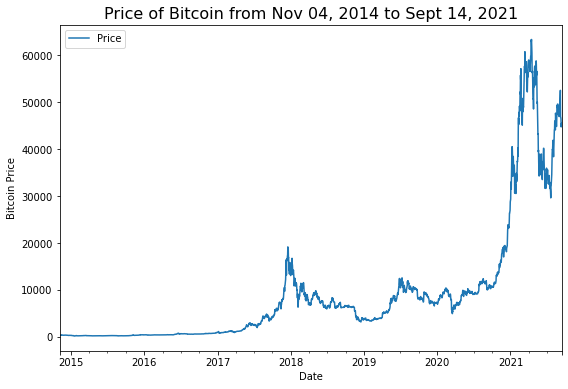

In [10]:
import matplotlib.pyplot as plt
btc_df.plot(figsize=(9,6))
plt.ylabel("Bitcoin Price")
plt.title("Price of Bitcoin from Nov 04, 2014 to Sept 14, 2021", fontsize=16);

### Read in the data with python's CSV module

In [7]:
import csv
from datetime import datetime

timesteps = []
btc_price= []

with open("/content/BTC_USD_2014-11-04_2021-09-14-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) #skip the first line (column titles)
  for line in csv_reader:
    #get the dates in date format (convert from string to date)
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) 
    #get the closing price as float
    btc_price.append(float(line[2]))


In [11]:
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 11, 4, 0, 0),
  datetime.datetime(2014, 11, 5, 0, 0),
  datetime.datetime(2014, 11, 6, 0, 0),
  datetime.datetime(2014, 11, 7, 0, 0),
  datetime.datetime(2014, 11, 8, 0, 0),
  datetime.datetime(2014, 11, 9, 0, 0),
  datetime.datetime(2014, 11, 10, 0, 0),
  datetime.datetime(2014, 11, 11, 0, 0),
  datetime.datetime(2014, 11, 12, 0, 0),
  datetime.datetime(2014, 11, 13, 0, 0)],
 [324.71833,
  332.45666,
  336.585,
  346.775,
  344.81166,
  343.065,
  358.50166,
  368.07666,
  376.99666,
  442.10666])

### Plot from CSV

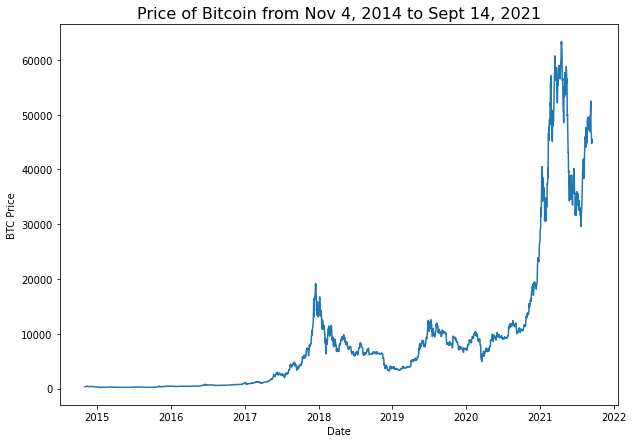

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from Nov 4, 2014 to Sept 14, 2021", fontsize=16)
plt.xlabel("Date");

## Format Data

### Create, Train and Test sets of our Time Series Data

#### Creating train and test sets with time series data (the wrong way)

In [16]:
btc_df.head()

,Price
Date,
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500
2014-11-07,346.77500
2014-11-08,344.81166


In [17]:
# Get bitcoin date array
timesteps = btc_df.index.to_numpy()
prices = btc_df['Price'].to_numpy()

In [18]:
timesteps[:10], prices[:10]

(array(['2014-11-04T00:00:00.000000000', '2014-11-05T00:00:00.000000000',
        '2014-11-06T00:00:00.000000000', '2014-11-07T00:00:00.000000000',
        '2014-11-08T00:00:00.000000000', '2014-11-09T00:00:00.000000000',
        '2014-11-10T00:00:00.000000000', '2014-11-11T00:00:00.000000000',
        '2014-11-12T00:00:00.000000000', '2014-11-13T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([324.71833, 332.45666, 336.585  , 346.775  , 344.81166, 343.065  ,
        358.50166, 368.07666, 376.99666, 442.10666]))

In [19]:
# The wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2005,), (502,), (2005,), (502,))

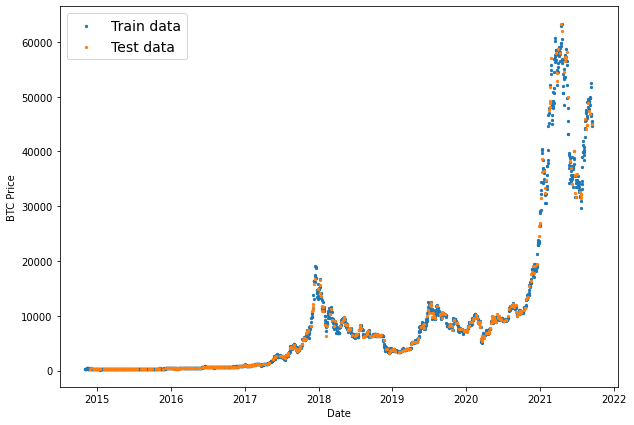

In [20]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

#### Creating train and test sets with time series data (the right way)

In [22]:
split_size = int(0.8 * len(prices)) # 80% training / 20% test

In [23]:
# Create train dataset
X_train, y_train = timesteps[:split_size], prices[:split_size]

#Create test dataset
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)


(2005, 502, 2005, 502)

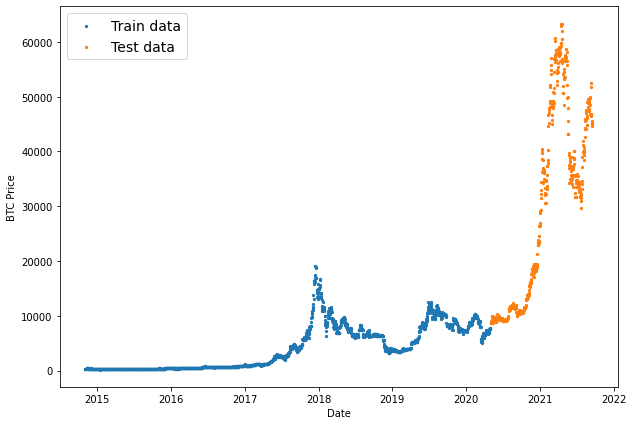

In [24]:
# Let's plot the train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

#### Create a plotting function

In [31]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) 
  against values (a series of values across time)

  Parameters
  ----------------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default : None

  """
  
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  
  plt.grid(True)

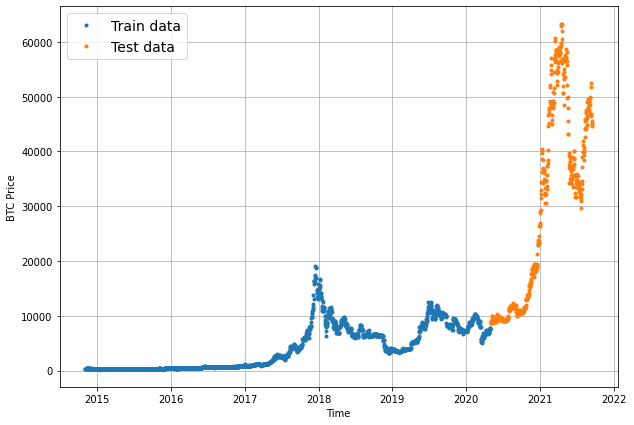

In [32]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling experiments

Terms to be familiar with:
* **`Horizon`** - number of steps into the future we are going to predicct.

* **`Window size`** - number of timesteps we're going to use to predict horizon

### Model 0. Naive Forecast (Baseline)

The formula:

$$\hat{y}_{t} = y_{t-1}$$

In English:
> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1

In [33]:
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([8767.67262337, 8853.77448401, 8963.0575578 , 8904.71381654,
        8887.50589259, 8978.28358712, 9371.68427279, 9900.67886662,
        9917.24841434, 9617.51819493]),
 array([49709.61199434, 49999.55557859, 51693.80939808, 52506.68564748,
        46897.60147675, 46769.31439122, 46404.36448102, 44720.75555014,
        45253.13062479, 45510.56324938]))

In [34]:
y_test[-10:]

array([49999.55557859, 51693.80939808, 52506.68564748, 46897.60147675,
       46769.31439122, 46404.36448102, 44720.75555014, 45253.13062479,
       45510.56324938, 45097.79721752])

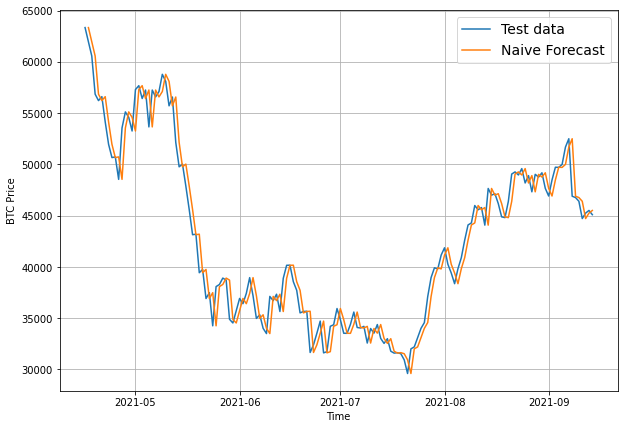

In [40]:
# Plot naive forecast
plt.figure(figsize=(10,7))
#plot_time_series(timesteps=X_train, values=y_train, label="Train data", start=200)
plot_time_series(timesteps=X_test, values=y_test, label="Test data", format='-', start=350)
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', label="Naive Forecast", start=350)

#### Reference book: 'Forecasting: Principles in Practice'

### Evaluating a TimeSeries model

We're predicting a number, i.e. it's a form of regression problem.

Because we're working on a regression problem, we need regression metrics:

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error

We're evaluating **how does our model forecast compared to the actual values?**

Reference: Forecasting: Principles and Practice, chapter 5.8

In [41]:
import tensorflow as tf

In [42]:
# MASE implementation (since there's no appropriate function in tensorflow)
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implementing MASE (assuming no seasonality of data, i.e. data is not influenced by season of the year).

  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  # Find MAE of naive forecast / seasonality (data published daily) is 1 days, hence shift 1 
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season



In [44]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9982082921428425

#### Custom Evaluation Function

In [45]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 dtype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [46]:
naive_results = evaluate_preds(y_true=y_test[1:], 
                               y_pred=naive_forecast)
naive_results

{'mae': 839.7061,
 'mape': 2.6012962,
 'mase': 0.9982083,
 'mse': 1825811.2,
 'rmse': 1351.2258}

In [47]:
# average price
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=28914.90424048091>

In [48]:
# max / min prices
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=8608.125245038>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)